In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('/content/synthetic_health_80k.csv')
df.head(5)

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target_at_risk
0,S000001,38,Male,181.1,84.3,25.7,25.0,0.3531,26.3,128.5,...,0.2,3,30,0,0,141.8,0.0,67,0,0
1,S000002,46,Female,151.8,53.2,23.1,24.2,0.2673,23.3,109.6,...,3.5,3,181,1,1,138.8,0.0,48,0,0
2,S000003,39,Female,161.3,80.4,30.9,29.2,0.5248,31.9,131.9,...,3.9,3,251,1,0,140.0,0.0,63,128,1
3,S000004,48,Female,166.4,59.8,21.6,20.5,0.2178,21.8,114.7,...,4.3,3,278,0,0,140.6,0.0,68,0,1
4,S000005,37,Male,171.5,72.9,24.8,23.9,0.3234,25.7,126.0,...,2.4,2,0,0,0,141.9,1.0,72,0,0


In [203]:
df.shape

(80000, 48)

In [204]:
missing_values = df.isnull().sum()
print(missing_values)

survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure                  0
heart_rate                   9613
cholesterol                     0
glucose                         0
insulin                     14478
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  7927
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         24046
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_leve

In [205]:
df.dtypes[df.isnull().any()] #df.isnull() me muestra los valores nulos. .any() me devuelve una serie booleana True si alguna fila tiene nulo en esa columna. df.dtypes me devuleve los tipos de datos de mis variables

,0
heart_rate,float64
insulin,float64
daily_steps,float64
alcohol_consumption,float64
income,float64
gene_marker_flag,float64


In [206]:
df["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
0.0,25264
1.9,596
2.0,584
1.8,583
2.1,571
...,...
17.5,1
21.7,1
19.6,1


<Axes: xlabel='age'>

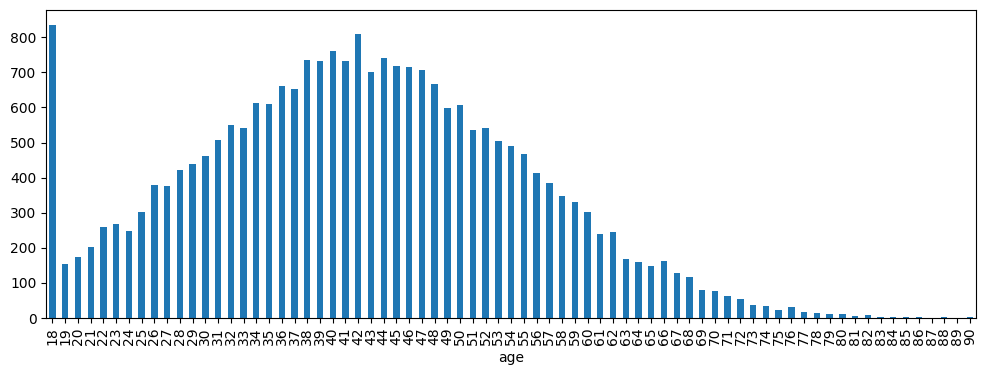

In [207]:
df[df['alcohol_consumption'].isnull()].groupby('age').size().plot(kind='bar', figsize=(12, 4))


La edad parece no tener relación con los valores faltantes en la variable **"alcohol_consumption"**

In [208]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Desconocido')

In [209]:
df["exercise_type"].value_counts()

,count
exercise_type,
low_impact,20182
cardio,17688
none,17633
mixed,14123
strength,10374


In [210]:
df['exercise_type'] = df['exercise_type'].fillna('Desconocido')


In [211]:
df["caffeine_intake"].value_counts()

,count
caffeine_intake,
0,18121
208,289
178,285
204,273
165,273
...,...
516,1
493,1
572,1


In [212]:
df['caffeine_intake'] = df['caffeine_intake'].fillna('Desconocido')

In [213]:
df["gene_marker_flag"].value_counts()

,count
gene_marker_flag,
0.0,61278
1.0,8448


In [214]:
df.drop(columns=["gene_marker_flag"], inplace=True)

Vemos que "gene_marker_flag" no tiene variabilidad por lo que se decide eliminar la variable

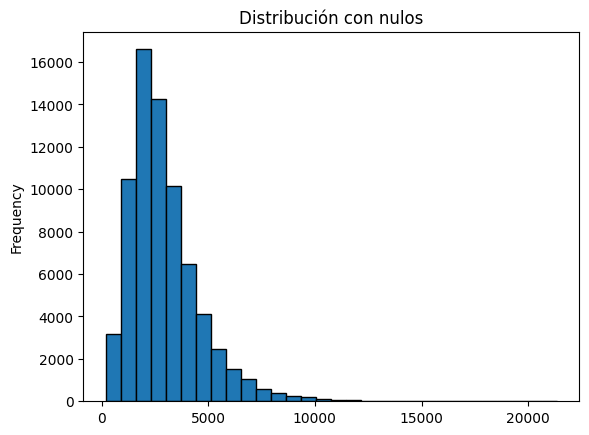

In [215]:
df['income'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución con nulos')
plt.show()

In [216]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].mean())
df['insulin'] = df['insulin'].fillna(df['insulin'].mean())
df['daily_steps'] = df['daily_steps'].fillna(df['daily_steps'].mean())
df['income'] = df['income'].fillna(df['income'].mean())

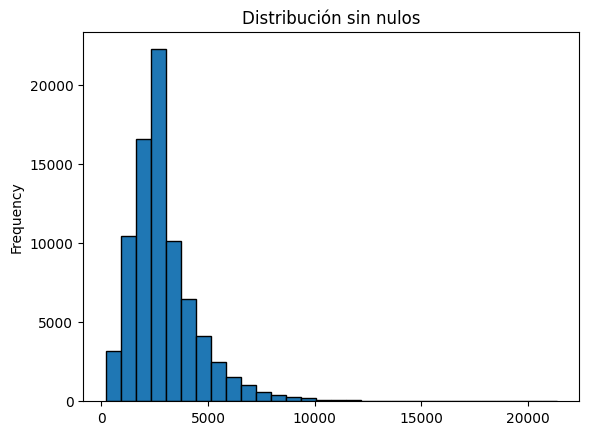

In [217]:
df['income'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución sin nulos')
plt.show()

In [218]:
missing_values = df.isnull().sum()
df.dropna(inplace=True)
print(missing_values)

survey_code                 0
age                         0
gender                      0
height                      0
weight                      0
bmi                         0
bmi_estimated               0
bmi_scaled                  0
bmi_corrected               0
waist_size                  0
blood_pressure              0
heart_rate                  0
cholesterol                 0
glucose                     0
insulin                     0
sleep_hours                 0
sleep_quality               0
work_hours                  0
physical_activity           0
daily_steps                 0
calorie_intake              0
sugar_intake                0
alcohol_consumption         0
smoking_level               0
water_intake                0
screen_time                 0
stress_level                0
mental_health_score         0
mental_health_support       0
education_level             0
job_type                    0
occupation                  0
income                      0
diet_type 

In [219]:
df_categoricas = df.select_dtypes(include=['object', 'category'])
df_numericas = df.select_dtypes(include=['number'])

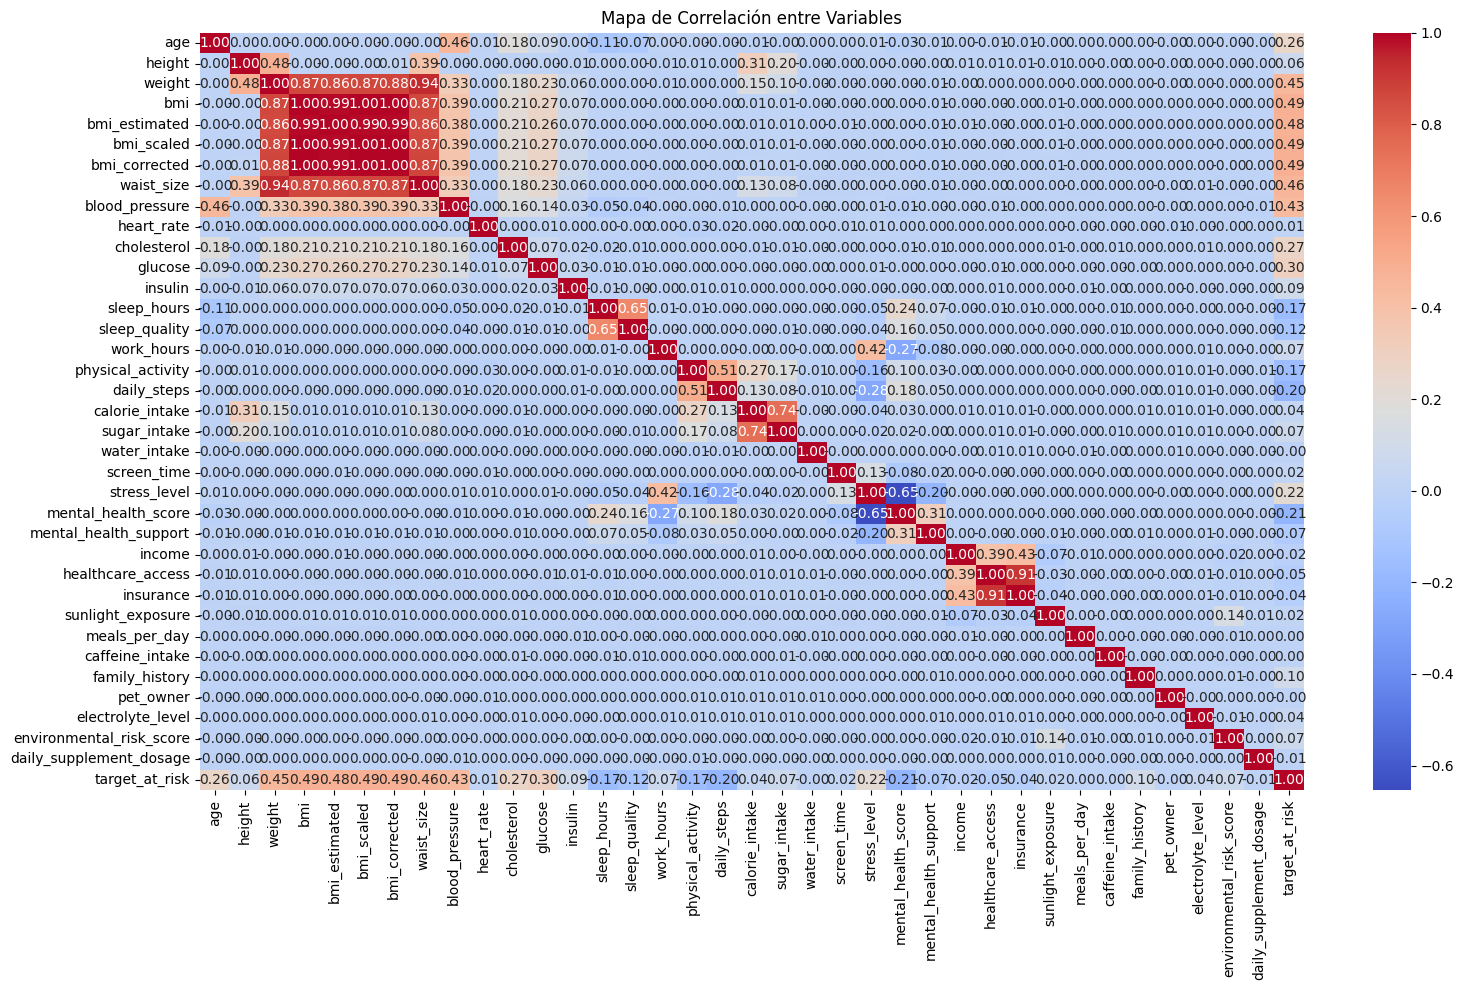

In [220]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación entre Variables')
plt.tight_layout()
plt.show()

In [221]:
df.drop(columns=["bmi_estimated", "bmi_scaled", "bmi_corrected", "height", "weight"], inplace=True)

In [222]:
df["target_at_risk"].value_counts()

#1 es propenso a enfermedades y 0 es no propenso a emfermedades

,count
target_at_risk,
1,40710
0,39290


Se eliminaron todas las variables que estaban muy correlacionadas entre si para evitar despues fallos en la modelacion que se hara posteriormente.

In [223]:
import pandas as pd
from scipy.stats import chi2_contingency

# Carga tu DataFrame (si no lo has cargado ya)
# df = pd.read_csv("synthetic_health_80k.csv")

# Lista de variables categóricas
categorical_vars = [
    "gender", "smoking_level", "education_level", "job_type", "occupation",
    "diet_type", "exercise_type", "device_usage", "healthcare_access",
    "insurance", "mental_health_support", "family_history", "pet_owner",
]

# Almacenar resultados de la prueba chi-cuadrado
chi2_results = []

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df["target_at_risk"])

    # Evitar errores en tablas sin suficientes categorías
    if contingency_table.shape[1] < 2:
        continue

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        "variable": var,
        "chi2_stat": round(chi2, 4),
        "p_value": round(p, 5),
        "degrees_of_freedom": dof,
        "significant_at_0.05": p < 0.05
    })

# Convertir resultados a DataFrame y ordenarlos
chi2_df = pd.DataFrame(chi2_results).sort_values("p_value")

# Mostrar resultados
print("Resultados de la prueba Chi-cuadrado (ordenados por p-valor):")
print(chi2_df)


Resultados de la prueba Chi-cuadrado (ordenados por p-valor):
                 variable  chi2_stat  p_value  degrees_of_freedom  \
0                  gender   310.3230  0.00000                   2   
1           smoking_level   344.0666  0.00000                   4   
3                job_type    51.4241  0.00000                   5   
5               diet_type   292.8999  0.00000                   5   
6           exercise_type  1155.6195  0.00000                   4   
10  mental_health_support   375.7563  0.00000                   1   
9               insurance   160.2160  0.00000                   1   
8       healthcare_access   197.4210  0.00000                   1   
11         family_history   775.1045  0.00000                   1   
4              occupation    60.0707  0.00001                  21   
2         education_level     7.8495  0.04923                   3   
7            device_usage     0.9897  0.60966                   2   
12              pet_owner     0.0046  0.9

In [224]:
df.drop(columns= ["occupation", "device_usage", "job_type", "pet_owner"], inplace = True )

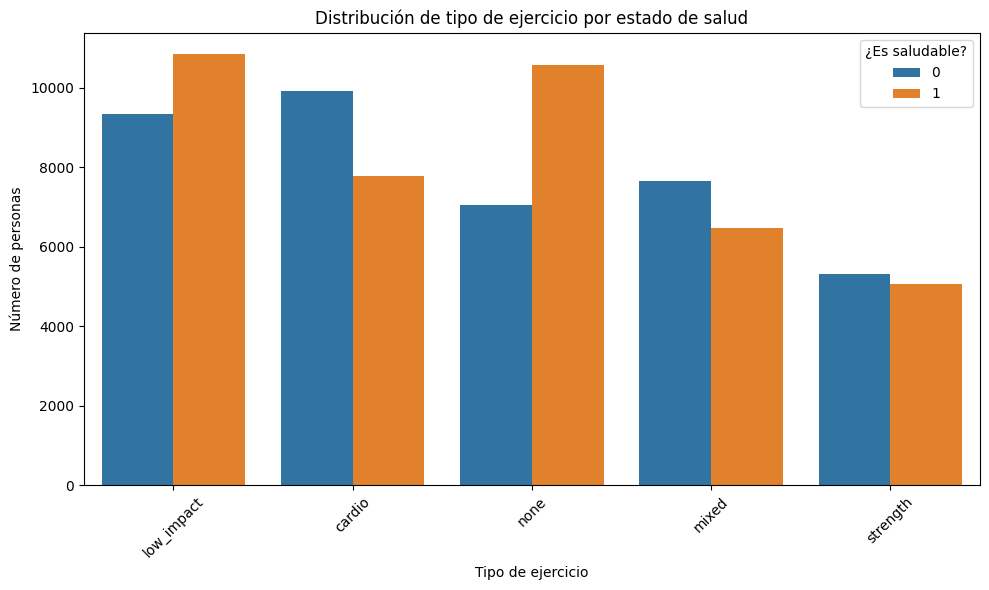

In [225]:
# Gráfica de barras filtrada por el target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='exercise_type', hue='target_at_risk')
plt.title('Distribución de tipo de ejercicio por estado de salud')
plt.xlabel('Tipo de ejercicio')
plt.ylabel('Número de personas')
plt.legend(title='¿Es saludable?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

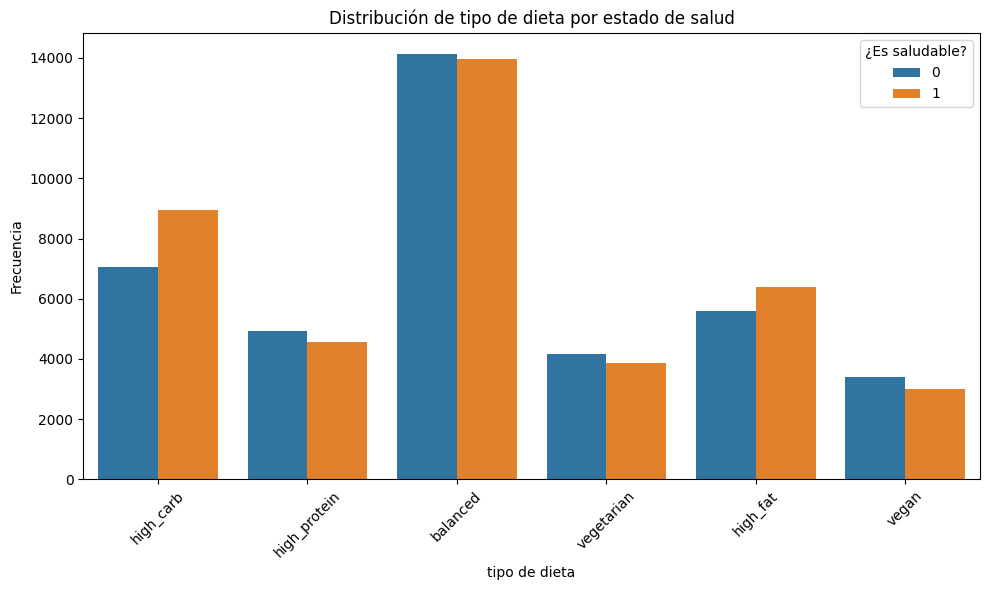

In [226]:
# Gráfica de barras filtrada por el target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diet_type', hue='target_at_risk')
plt.title('Distribución de tipo de dieta por estado de salud')
plt.xlabel('tipo de dieta')
plt.ylabel('Frecuencia')
plt.legend(title='¿Es saludable?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

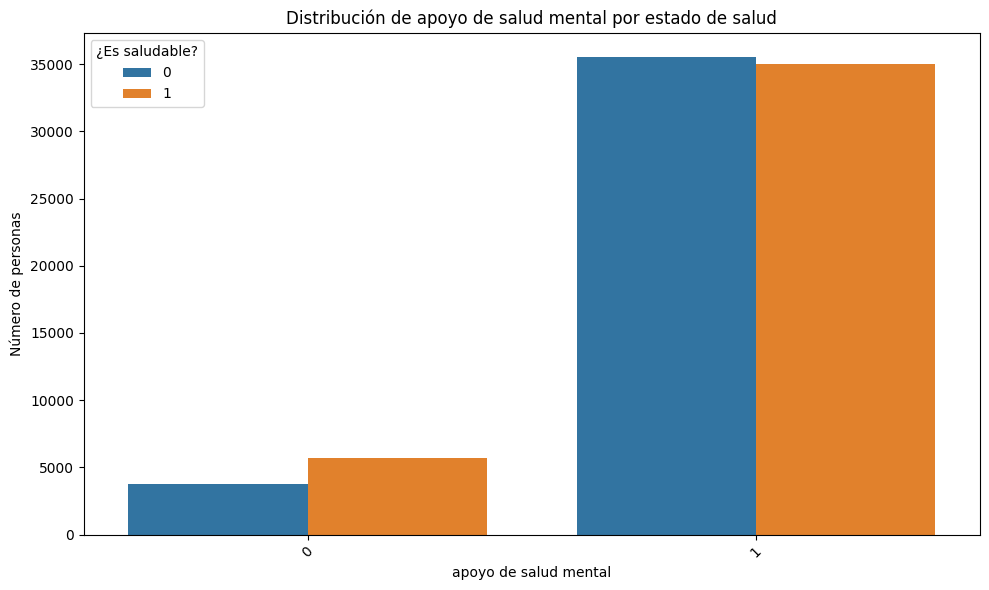

In [227]:
# Gráfica de barras filtrada por el target
# cuenta con apoyo 1 y no cuenta con apoyo 0
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='mental_health_support', hue='target_at_risk')
plt.title('Distribución de apoyo de salud mental por estado de salud')
plt.xlabel('apoyo de salud mental')
plt.ylabel('Número de personas')
plt.legend(title='¿Es saludable?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

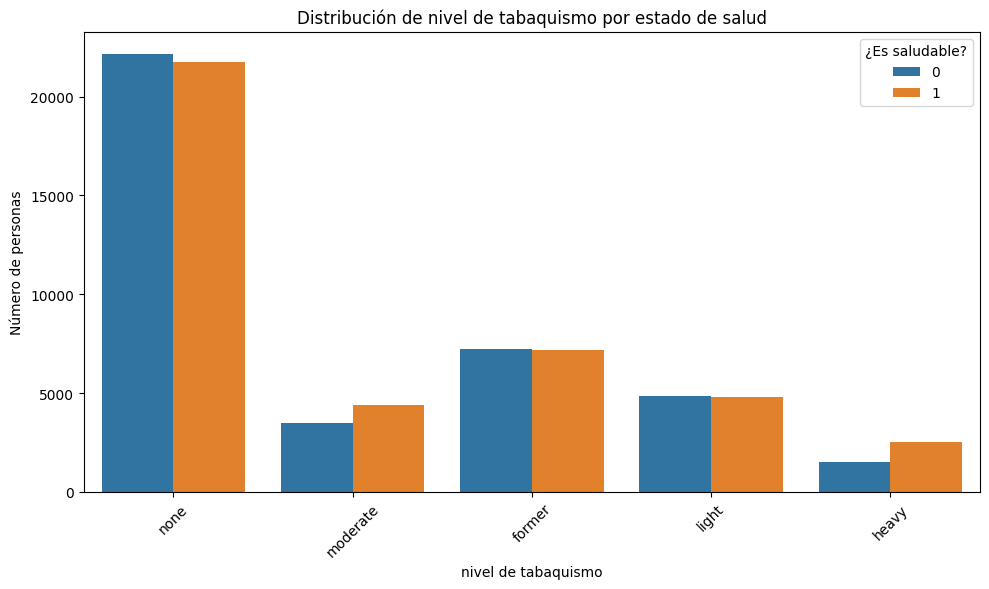

In [228]:
# Gráfica de barras filtrada por el target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_level', hue='target_at_risk')
plt.title('Distribución de nivel de tabaquismo por estado de salud')
plt.xlabel('nivel de tabaquismo')
plt.ylabel('Número de personas')
plt.legend(title='¿Es saludable?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

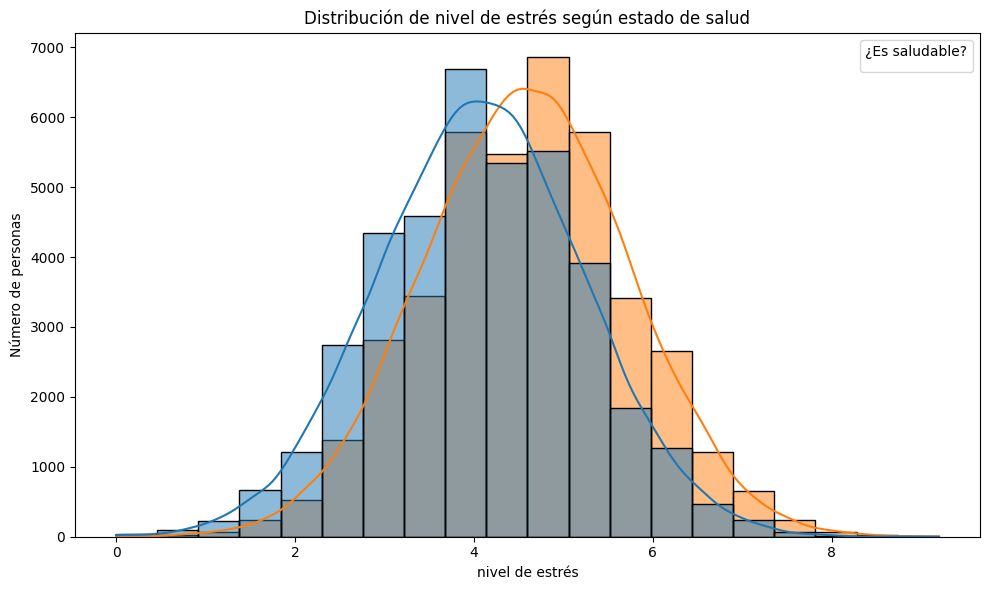

In [229]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stress_level', hue='target_at_risk', bins=20, kde=True, stat='count')
plt.title('Distribución de nivel de estrés según estado de salud')
plt.xlabel('nivel de estrés')
plt.ylabel('Número de personas')
plt.legend(title='¿Es saludable?')
plt.tight_layout()
plt.show()

In [230]:
df["sleep_quality"].value_counts()

,count
sleep_quality,
5,39476
4,25367
3,11283
2,3298
1,576


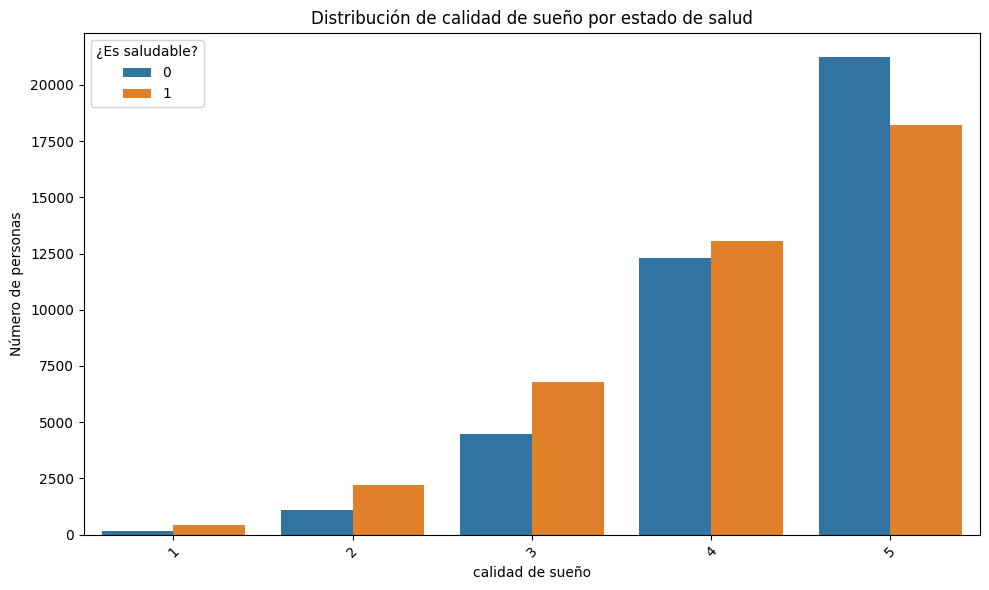

In [231]:
# Gráfica de barras filtrada por el target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sleep_quality', hue='target_at_risk')
plt.title('Distribución de calidad de sueño por estado de salud')
plt.xlabel('calidad de sueño')
plt.ylabel('Número de personas')
plt.legend(title='¿Es saludable?')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

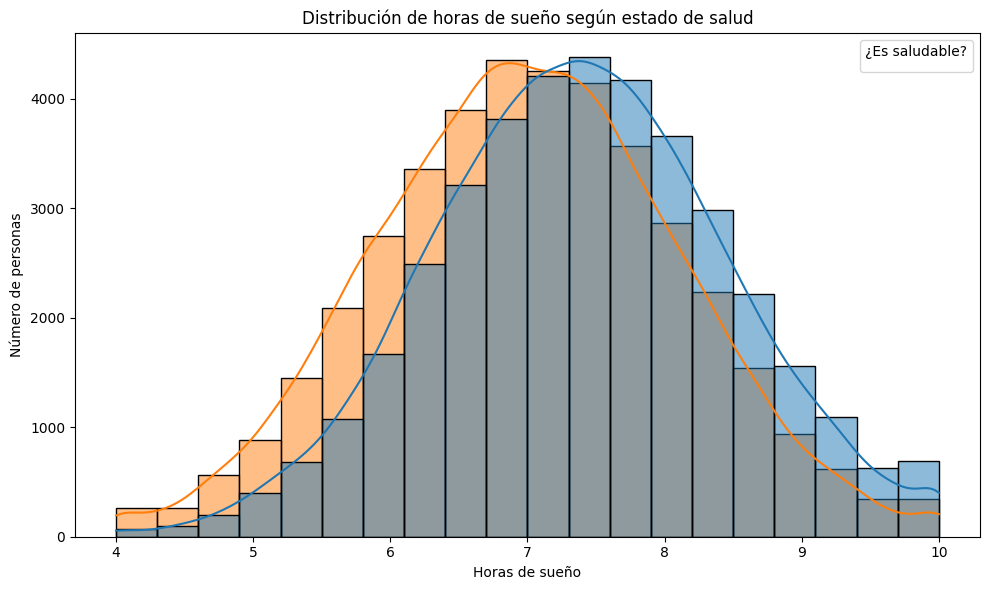

In [232]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sleep_hours', hue='target_at_risk', bins=20, kde=True, stat='count')
plt.title('Distribución de horas de sueño según estado de salud')
plt.xlabel('Horas de sueño')
plt.ylabel('Número de personas')
plt.legend(title='¿Es saludable?')
plt.tight_layout()
plt.show()

📊 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7858
           1       0.84      0.82      0.83      8142

    accuracy                           0.83     16000
   macro avg       0.83      0.83      0.83     16000
weighted avg       0.83      0.83      0.83     16000



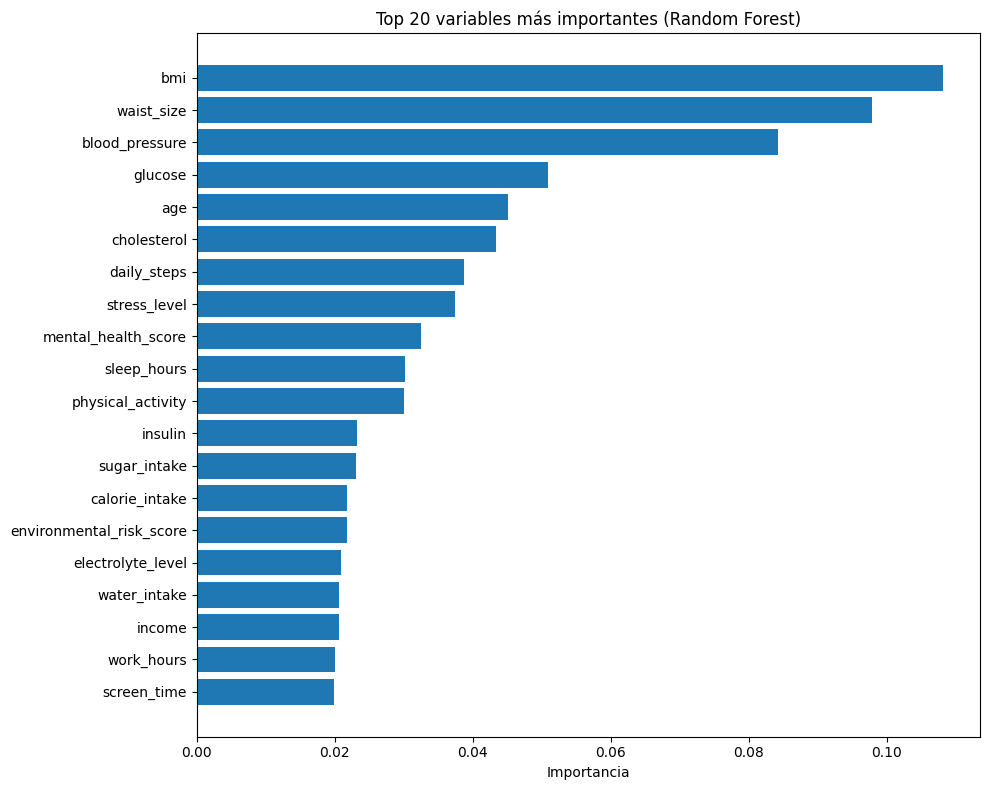

In [233]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Carga del dataset
# df = pd.read_csv("synthetic_health_80k.csv")

# 2. Separar X y y
X = df.drop(columns=["target_at_risk", "survey_code"])  # quitar columnas no predictoras
y = df["target_at_risk"]

# 3. Identificar variables
# 3. Identificar variables
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# 🔧 CORREGIR: asegurar que las categóricas sean string (NaN se vuelve "nan")
for col in categorical_cols:
    X[col] = X[col].astype(str)

# 4. Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 5. Crear pipeline con Random Forest
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# 6. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Entrenamiento
model.fit(X_train, y_train)

# 8. Evaluación
y_pred = model.predict(X_test)
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# 9. Obtener importancias
rf = model.named_steps["classifier"]
ohe = model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
feature_names_num = numerical_cols
feature_names_cat = ohe.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([feature_names_num, feature_names_cat])

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# 10. Mostrar top 20
plt.figure(figsize=(10, 8))
plt.barh(importance_df.head(20).iloc[::-1]["Feature"], importance_df.head(20).iloc[::-1]["Importance"])
plt.xlabel("Importancia")
plt.title("Top 20 variables más importantes (Random Forest)")
plt.tight_layout()
plt.show()


📊 Reporte de clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      7858
           1       0.86      0.85      0.85      8142

    accuracy                           0.85     16000
   macro avg       0.85      0.85      0.85     16000
weighted avg       0.85      0.85      0.85     16000



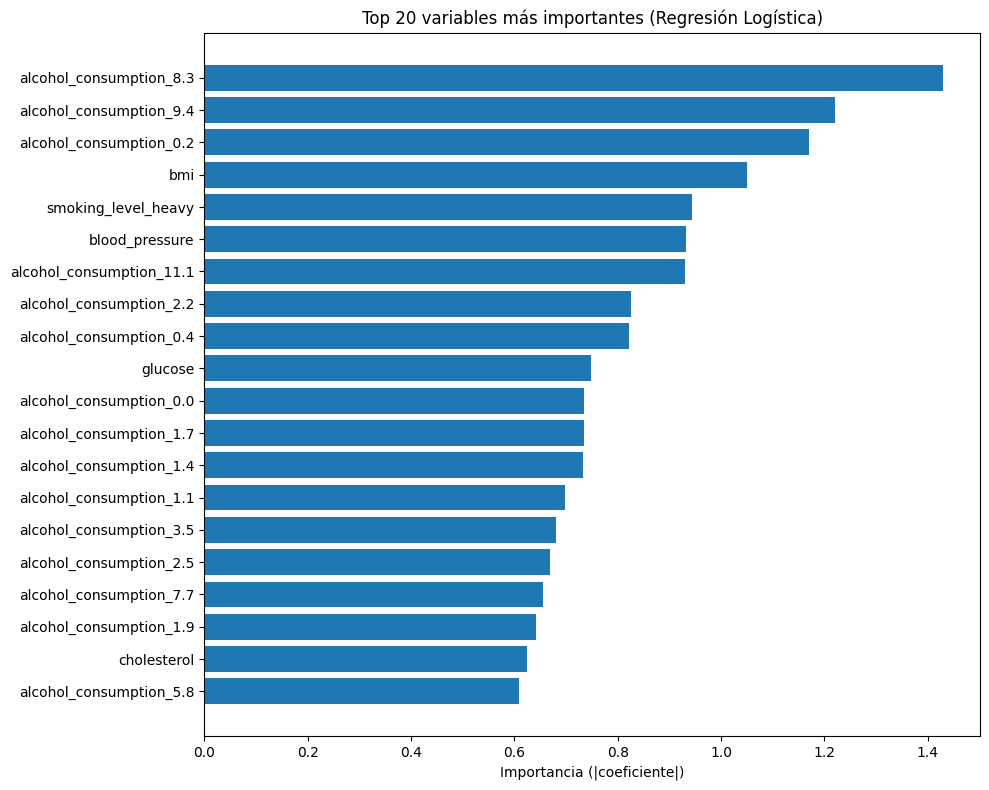

In [234]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Cargar dataset (si aún no lo has hecho)
# df = pd.read_csv("synthetic_health_80k.csv")

# 2. Separar features y target
X = df.drop(columns=["target_at_risk", "survey_code"])
y = df["target_at_risk"]

# 3. Identificar columnas
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# 🔧 Corregir mezcla de tipos para evitar errores con OneHotEncoder
for col in categorical_cols:
    X[col] = X[col].astype(str)

# 4. Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 5. Modelo con regresión logística (penalización l2 por defecto)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 6. Separar datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Entrenar modelo
model.fit(X_train, y_train)

# 8. Evaluar modelo
y_pred = model.predict(X_test)
print("📊 Reporte de clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred))

# 9. Importancia de variables (coeficientes)
logreg = model.named_steps["classifier"]
ohe = model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
feature_names = np.concatenate([
    numerical_cols,
    ohe.get_feature_names_out(categorical_cols)
])

# Coeficientes
coefs = logreg.coef_[0]
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "AbsCoefficient": np.abs(coefs)
}).sort_values("AbsCoefficient", ascending=False)

# 10. Mostrar top 20 variables
plt.figure(figsize=(10, 8))
plt.barh(coef_df.head(20).iloc[::-1]["Feature"], coef_df.head(20).iloc[::-1]["AbsCoefficient"])
plt.xlabel("Importancia (|coeficiente|)")
plt.title("Top 20 variables más importantes (Regresión Logística)")
plt.tight_layout()
plt.show()


##Modelos

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# 1. Separar variables
X = df.drop(columns=["target_at_risk", "survey_code"])
y = df["target_at_risk"]

# 2. Identificar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Asegurarse que las categóricas sean strings
for col in categorical_cols:
    X[col] = X[col].astype(str)

# 3. Crear pipelines de transformación
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 4. Separar datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔁 Aplicar preprocesamiento a X_train y X_test
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# 5. Entrenar múltiples modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_prep, y_train)
    y_pred = modelo.predict(X_test_prep)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    resultados[nombre] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"{nombre}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")


Regresión Logística:
  Accuracy: 0.8504
  Precision: 0.8505
  Recall: 0.8504
  F1-Score: 0.8504

Árbol de Decisión:
  Accuracy: 0.7326
  Precision: 0.7327
  Recall: 0.7326
  F1-Score: 0.7326

Random Forest:
  Accuracy: 0.8301
  Precision: 0.8306
  Recall: 0.8301
  F1-Score: 0.8301

K-Nearest Neighbors:
  Accuracy: 0.7846
  Precision: 0.7867
  Recall: 0.7846
  F1-Score: 0.7844



In [237]:
df= pd.read_csv('/content/synthetic_health_80k.csv')
columnas= ["age", "bmi", "blood_pressure", "glucose","waist_size", "daily_steps", "stress_level", "cholesterol" , "target_at_risk"]
df = df[columnas]
df

,age,bmi,blood_pressure,glucose,waist_size,daily_steps,stress_level,cholesterol,target_at_risk
0,38,25.7,129,117,128.5,4398.0,4.4,176,0
1,46,23.1,126,80,109.6,3935.0,2.9,171,0
2,39,30.9,124,70,131.9,5358.0,4.4,184,1
3,48,21.6,156,107,114.7,4323.0,4.8,180,1
4,37,24.8,126,98,126.0,5747.0,2.9,179,0
...,...,...,...,...,...,...,...,...,...
79995,38,22.4,130,84,126.1,NaN,2.6,223,0
79996,62,23.8,142,115,116.5,6020.0,2.4,226,1
79997,47,31.0,142,79,139.9,3370.0,5.8,143,0
79998,18,24.7,104,94,125.3,5296.0,3.5,199,0


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             80000 non-null  int64  
 1   bmi             80000 non-null  float64
 2   blood_pressure  80000 non-null  int64  
 3   glucose         80000 non-null  int64  
 4   waist_size      80000 non-null  float64
 5   daily_steps     72073 non-null  float64
 6   stress_level    80000 non-null  float64
 7   cholesterol     80000 non-null  int64  
 8   target_at_risk  80000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 5.5 MB


In [239]:

# 1. Separar variables
X = df.drop(columns=["target_at_risk"])
y = df["target_at_risk"]

# 2. Identificar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Asegurarse que las categóricas sean strings
for col in categorical_cols:
    X[col] = X[col].astype(str)

# 3. Crear pipelines de transformación
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# 4. Separar datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔁 Aplicar preprocesamiento a X_train y X_test
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# 5. Entrenar múltiples modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_prep, y_train)
    y_pred = modelo.predict(X_test_prep)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    resultados[nombre] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"{nombre}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")

Regresión Logística:
  Accuracy: 0.8141
  Precision: 0.8141
  Recall: 0.8141
  F1-Score: 0.8141

Árbol de Decisión:
  Accuracy: 0.7277
  Precision: 0.7277
  Recall: 0.7277
  F1-Score: 0.7277

Random Forest:
  Accuracy: 0.8106
  Precision: 0.8111
  Recall: 0.8106
  F1-Score: 0.8106

K-Nearest Neighbors:
  Accuracy: 0.7881
  Precision: 0.7884
  Recall: 0.7881
  F1-Score: 0.7881



In [240]:
mejor_modelo_nombre = max(resultados, key=lambda x: resultados[x]['Recall'])
print(f"\n✅ Mejor modelo según Recall: {mejor_modelo_nombre}")


✅ Mejor modelo según Recall: Regresión Logística


In [241]:
# Definir los mejores hiperparámetros para el modelo seleccionado
if mejor_modelo_nombre == "Regresión Logística":
    grid = {"C": [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    modelo_base = LogisticRegression(max_iter=10000)
elif mejor_modelo_nombre == "Arbol de Decisión":
    grid = {"max_depth": [3, 5, 10]}
    modelo_base = DecisionTreeClassifier()
elif mejor_modelo_nombre == "Random Forest":
    grid = {"n_estimators": [50, 100, 200]}
    modelo_base = RandomForestClassifier()
elif mejor_modelo_nombre == "K-Nearest Neighbors":
    grid = {"n_neighbors": [3, 5, 7]}
    modelo_base = KNeighborsClassifier()

grid_search = GridSearchCV(modelo_base, grid, cv=5)
grid_search.fit(X_train_prep, y_train)
mejores_parametros = grid_search.best_params_
print(f"Mejores hiperparámetros encontrados para {mejor_modelo_nombre}: {mejores_parametros}")

Mejores hiperparámetros encontrados para Regresión Logística: {'C': 0.01, 'solver': 'liblinear'}


In [242]:
# Reentrenar el mejor modelo con los mejores hiperparámetros
if mejor_modelo_nombre == "Regresión Logística":
    modelo_final = LogisticRegression(**mejores_parametros, max_iter=10000)
elif mejor_modelo_nombre == "Arbol de Decisión":
    modelo_final = DecisionTreeClassifier(**mejores_parametros)
elif mejor_modelo_nombre == "Random Forest":
    modelo_final = RandomForestClassifier(**mejores_parametros)
elif mejor_modelo_nombre == "K-Nearest Neighbors":
    modelo_final = KNeighborsClassifier(**mejores_parametros)

modelo_final.fit(X_train_prep, y_train)

LogisticRegression(C=0.01, max_iter=10000, solver='liblinear')

Evaluación del Modelo Final (Random Forest):
Accuracy:  0.8141
Precision: 0.8142
Recall:    0.8141
F1-score:  0.8141

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7858
           1       0.82      0.81      0.82      8142

    accuracy                           0.81     16000
   macro avg       0.81      0.81      0.81     16000
weighted avg       0.81      0.81      0.81     16000



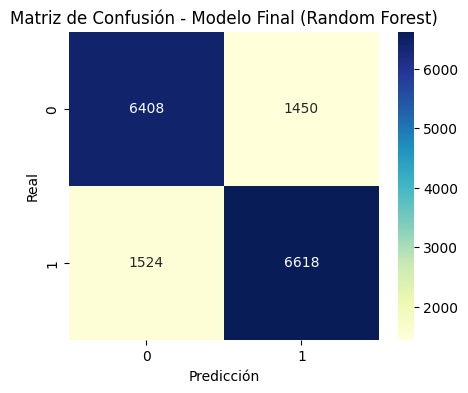

In [243]:
# Predicciones con el modelo final
y_pred_final = modelo_final.predict(X_test_prep)


# Métricas de evaluación
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted')
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

print("Evaluación del Modelo Final (Random Forest):")
print(f"Accuracy:  {acc_final:.4f}")
print(f"Precision: {prec_final:.4f}")
print(f"Recall:    {rec_final:.4f}")
print(f"F1-score:  {f1_final:.4f}")

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Matriz de confusión
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión - Modelo Final (Random Forest)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Evaluación del Modelo Final (Random Forest):
Accuracy:  0.8141
Precision: 0.8142
Recall:    0.8141
F1-score:  0.8141

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7858
           1       0.82      0.81      0.82      8142

    accuracy                           0.81     16000
   macro avg       0.81      0.81      0.81     16000
weighted avg       0.81      0.81      0.81     16000



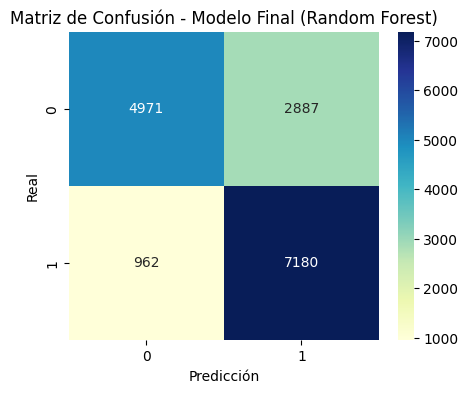

In [244]:
# Obtener probabilidades
y_probs = modelo.predict_proba(X_test_prep)[:, 1]  # Prob de clase 1

# Cambiar umbral (por ejemplo a 0.3)
umbral = 0.35
y_pred_custom = (y_probs >= umbral).astype(int)



# Métricas de evaluación
acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final, average='weighted')
rec_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

print("Evaluación del Modelo Final (Random Forest):")
print(f"Accuracy:  {acc_final:.4f}")
print(f"Precision: {prec_final:.4f}")
print(f"Recall:    {rec_final:.4f}")
print(f"F1-score:  {f1_final:.4f}")

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Matriz de confusión
cm_final = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión - Modelo Final (Random Forest)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [245]:
import joblib

joblib.dump(modelo_final, 'model_2.pkl')

['model_2.pkl']